In [180]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA

<p style="font-size: 24px">PARTIE 1 : PRE PROCESSING</p>

In [181]:
#on load les données
data = pd.read_csv('players_stats.csv')
data

,Name,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,...,Age,Birth_Place,Birthdate,Collage,Experience,Height,Pos,Team,Weight,BMI
0,AJ Price,26,324,133,51,137,37.2,15,57,26.3,...,29.0,us,"October 7, 1986",University of Connecticut,5,185.0,PG,PHO,81.45,23.798393
1,Aaron Brooks,82,1885,954,344,817,42.1,121,313,38.7,...,30.0,us,"January 14, 1985",University of Oregon,6,180.0,PG,CHI,72.45,22.361111
2,Aaron Gordon,47,797,243,93,208,44.7,13,48,27.1,...,20.0,us,"September 16, 1995",University of Arizona,R,202.5,PF,ORL,99.00,24.142661
3,Adreian Payne,32,740,213,91,220,41.4,1,9,11.1,...,24.0,us,"February 19, 1991",Michigan State University,R,205.0,PF,ATL,106.65,25.377751
4,Al Horford,76,2318,1156,519,965,53.8,11,36,30.6,...,29.0,do,"June 3, 1986",University of Florida,7,205.0,C,ATL,110.25,26.234384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,Xavier Henry,9,86,20,3,13,23.1,0,0,0.0,...,24.0,be,"March 15, 1991",University of Kansas,4,195.0,SF,LAL,99.00,26.035503
486,Zach LaVine,77,1902,778,286,677,42.2,57,167,34.1,...,20.0,us,"March 10, 1995","University of California, Los Angeles",R,192.5,PG,MIN,85.05,22.951594
487,Zach Randolph,71,2304,1143,454,932,48.7,7,20,35.0,...,34.0,us,"July 16, 1981",Michigan State University,13,202.5,PF,MEM,117.00,28.532236
488,Zaza Pachulia,73,1730,606,240,529,45.4,0,3,0.0,...,31.0,ge,"February 10, 1984",NaN,11,207.5,C,MIL,121.50,28.218900


In [182]:
#regardons le nom des colonnes
print(data.columns)

Index(['Name', 'Games Played', 'MIN', 'PTS', 'FGM', 'FGA', 'FG%', '3PM', '3PA',
       '3P%', 'FTM', 'FTA', 'FT%', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age', 'Birth_Place',
       'Birthdate', 'Collage', 'Experience', 'Height', 'Pos', 'Team', 'Weight',
       'BMI'],
      dtype='object')


In [183]:
#enlevons les colonnes clairement inutiles
data = data.drop(['Name','Birth_Place','Birthdate','Collage','Experience','Team'], axis=1)

In [184]:
#regardons si il y a des données importantes manquantes
print(data.isnull().sum())

Games Played     0
MIN              0
PTS              0
FGM              0
FGA              0
FG%              0
3PM              0
3PA              0
3P%              0
FTM              0
FTA              0
FT%              0
OREB             0
DREB             0
REB              0
AST              0
STL              0
BLK              0
TOV              0
PF               0
EFF              0
AST/TOV          0
STL/TOV          0
Age             68
Height          68
Pos             68
Weight          68
BMI             68
dtype: int64


In [185]:
#enlevons les lignes avec trou, 
#le poids et la taille sont trop important pour les remplacer par des valeurs neutres, on a déjà assez de données
data = data.dropna()
data

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Pos,Weight,BMI
0,26,324,133,51,137,37.2,15,57,26.3,16,...,14,15,110,3.29,0.50,29.0,185.0,PG,81.45,23.798393
1,82,1885,954,344,817,42.1,121,313,38.7,145,...,157,189,791,1.66,0.34,30.0,180.0,PG,72.45,22.361111
2,47,797,243,93,208,44.7,13,48,27.1,44,...,38,83,318,0.87,0.55,20.0,202.5,PF,99.00,24.142661
3,32,740,213,91,220,41.4,1,9,11.1,30,...,44,88,244,0.68,0.43,24.0,205.0,PF,106.65,25.377751
4,76,2318,1156,519,965,53.8,11,36,30.6,107,...,100,121,1530,2.44,0.68,29.0,205.0,C,110.25,26.234384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,9,86,20,3,13,23.1,0,0,0.0,14,...,3,6,7,1.00,1.00,24.0,195.0,SF,99.00,26.035503
486,77,1902,778,286,677,42.2,57,167,34.1,149,...,193,158,720,1.43,0.28,20.0,192.5,PG,85.05,22.951594
487,71,2304,1143,454,932,48.7,7,20,35.0,228,...,156,175,1422,0.98,0.44,34.0,202.5,PF,117.00,28.532236
488,73,1730,606,240,529,45.4,0,3,0.0,126,...,133,170,929,1.34,0.60,31.0,207.5,C,121.50,28.218900


In [186]:
#regardons le type de nos données
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 422 entries, 0 to 489
Data columns (total 28 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Games Played  422 non-null    int64  
 1   MIN           422 non-null    int64  
 2   PTS           422 non-null    int64  
 3   FGM           422 non-null    int64  
 4   FGA           422 non-null    int64  
 5   FG%           422 non-null    float64
 6   3PM           422 non-null    int64  
 7   3PA           422 non-null    int64  
 8   3P%           422 non-null    float64
 9   FTM           422 non-null    int64  
 10  FTA           422 non-null    int64  
 11  FT%           422 non-null    float64
 12  OREB          422 non-null    int64  
 13  DREB          422 non-null    int64  
 14  REB           422 non-null    int64  
 15  AST           422 non-null    int64  
 16  STL           422 non-null    int64  
 17  BLK           422 non-null    int64  
 18  TOV           422 non-null    

In [187]:
#La catégorie "Pos" n'est pas numérique, il faudra changer ça plus tard

In [188]:
#verifions si il y a des données bizarres/aberrantes
#print(data['Age'].describe())
#print(data['Height'].describe())
print(data.min())
print(data.max())

Games Played            1
MIN                     3
PTS                     0
FGM                     0
FGA                     0
FG%                   0.0
3PM                     0
3PA                     0
3P%                   0.0
FTM                     0
FTA                     0
FT%                   0.0
OREB                    0
DREB                    0
REB                     0
AST                     0
STL                     0
BLK                     0
TOV                     0
PF                      0
EFF                    -3
AST/TOV               0.0
STL/TOV               0.0
Age                  20.0
Height              172.5
Pos                     C
Weight              72.45
BMI             20.411523
dtype: object
Games Played           82
MIN                  2981
PTS                  2217
FGM                   659
FGA                  1470
FG%                  85.7
3PM                   286
3PA                   646
3P%                  66.7
FTM                   71

In [189]:
#ça semble correct

Axes(0.125,0.11;0.775x0.77)


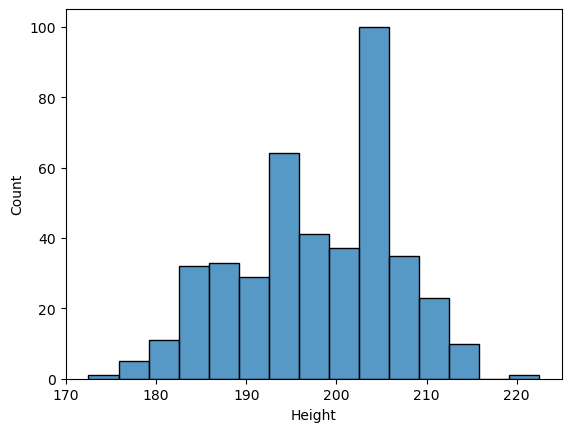

In [190]:
#observons quelques représentations de nos données
print(sns.histplot(data['Height'], bins=15))


Axes(0.125,0.11;0.775x0.77)


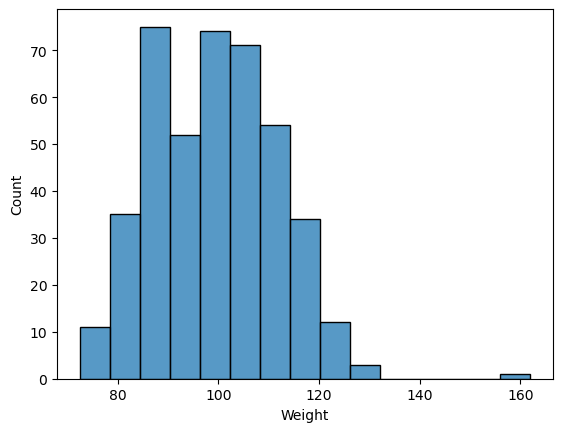

In [191]:
print(sns.histplot(data['Weight'], bins=15))

Axes(0.125,0.11;0.775x0.77)


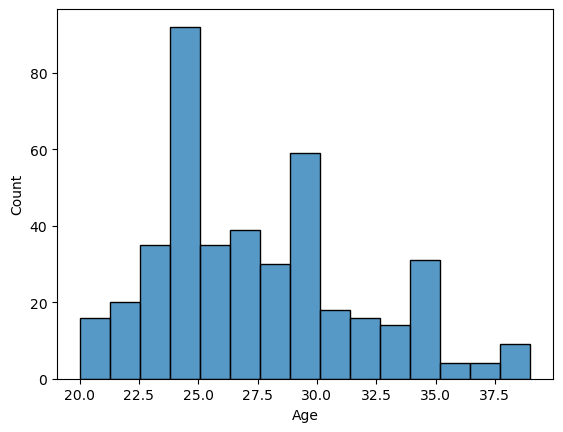

In [192]:
print(sns.histplot(data['Age'], bins=15))

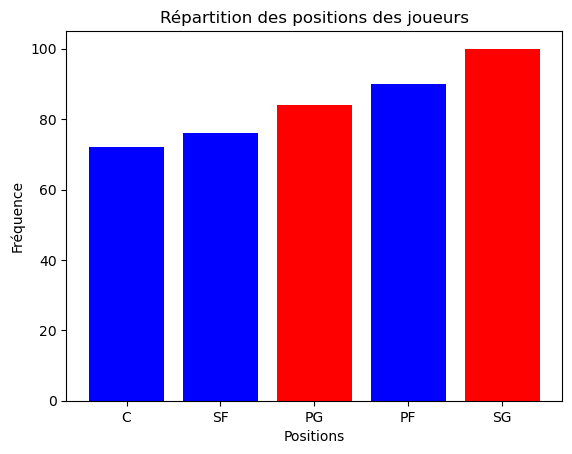

In [193]:
#observons la répartition des positions des joueurs

counts = data['Pos'].value_counts().sort_values()

#on sépare le frontcourt et le backcourt
mask = np.where((counts.index == 'PG') | (counts.index == 'SG'), 'red', 'blue')

plt.bar(counts.index, counts.values, color=mask)
plt.xlabel('Positions')
plt.ylabel('Fréquence')
plt.title('Répartition des positions des joueurs')

plt.show()

In [194]:
#c'est plutot bien réparti

In [195]:
#on va numériser la catégorie 'Pos' et faire 2 dataset, un binaire et l'autre avec 5 catégorie
data2=data.copy()
data5=data.copy()
data2["Pos2"] = data2["Pos"].apply(lambda x: 1 if x in ["PG", "SG"] else -1)
data5["Pos5"] = data5["Pos"].apply(lambda x: 1 if x == "PG" else (2 if x == "SG" else (3 if x == "SF" else (4 if x == "PF" else (5) ))))
data2 = data2.drop(columns=['Pos'])
data5 = data5.drop(columns=['Pos'])

In [196]:
#on va standardiser les données non bornées et normaliser les données de pourcentages
columns_to_standardize = ['Games Played', 'MIN', 'PTS', 'FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'EFF', 'AST/TOV', 'STL/TOV', 'Age', 'Height', 'Weight', 'BMI']
columns_to_normalize = ['FG%', '3P%', 'FT%']

# Normaliser les colonnes sélectionnées avec MinMaxScaler
scaler_norm = MinMaxScaler()
data2[columns_to_normalize] = scaler_norm.fit_transform(data[columns_to_normalize])
data5[columns_to_normalize] = scaler_norm.fit_transform(data[columns_to_normalize])

# Standardiser les colonnes sélectionnées avec StandardScaler
scaler_std = StandardScaler()
data2[columns_to_standardize] = scaler_std.fit_transform(data[columns_to_standardize])
data5[columns_to_standardize] = scaler_std.fit_transform(data[columns_to_standardize])

In [197]:
data2

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI,Pos2
0,-1.155955,-1.123018,-0.899322,-0.903107,-0.865146,0.434072,-0.532293,-0.461559,0.394303,-0.789898,...,-0.976072,-1.362868,-1.003674,2.217611,-0.346298,0.354135,-1.425076,-1.459095,-0.950748,1
1,1.176882,0.776979,1.029017,0.956065,1.142702,0.491249,1.613185,1.493629,0.580210,0.626548,...,1.505582,1.316884,0.447009,0.208330,-0.778739,0.591349,-1.997822,-2.187865,-1.789420,1
2,-0.281141,-0.547298,-0.640958,-0.636605,-0.655503,0.521587,-0.572773,-0.530296,0.406297,-0.482453,...,-0.559571,-0.315608,-0.560587,-0.765493,-0.211161,-1.780793,0.579531,-0.037993,-0.749863,-1
3,-0.906008,-0.616677,-0.711421,-0.649295,-0.620071,0.483081,-0.815658,-0.828157,0.166417,-0.636175,...,-0.455446,-0.238604,-0.718224,-0.999704,-0.535491,-0.831936,0.865904,0.581462,-0.029173,-1
4,0.926936,1.304013,1.503468,2.066492,1.579704,0.627771,-0.613254,-0.621946,0.458771,0.209300,...,0.516391,0.269625,2.021245,1.169826,0.140197,0.354135,0.865904,0.872970,0.470683,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,-1.864138,-1.412704,-1.164733,-1.207682,-1.231284,0.269545,-0.835898,-0.896894,0.000000,-0.811859,...,-1.166969,-1.501476,-1.223087,-0.605244,1.005079,-0.831936,-0.279586,-0.037993,0.354633,-1
486,0.968593,0.797671,0.615633,0.588038,0.729321,0.492415,0.317802,0.378561,0.511244,0.670469,...,2.130334,0.839457,0.295763,-0.075188,-0.940904,-1.780793,-0.565959,-1.167587,-1.444866,1
487,0.718647,1.286972,1.472934,1.654048,1.482265,0.568261,-0.694215,-0.744145,0.524738,1.537905,...,1.488228,1.101272,1.791181,-0.629897,-0.508464,1.540206,0.579531,1.419548,1.811508,-1
488,0.801962,0.588319,0.211645,0.296154,0.292319,0.529755,-0.835898,-0.873982,0.000000,0.417924,...,1.089081,1.024268,0.740980,-0.186130,-0.076023,0.828563,1.152276,1.783933,1.628672,-1


In [198]:
data5

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI,Pos5
0,-1.155955,-1.123018,-0.899322,-0.903107,-0.865146,0.434072,-0.532293,-0.461559,0.394303,-0.789898,...,-0.976072,-1.362868,-1.003674,2.217611,-0.346298,0.354135,-1.425076,-1.459095,-0.950748,1
1,1.176882,0.776979,1.029017,0.956065,1.142702,0.491249,1.613185,1.493629,0.580210,0.626548,...,1.505582,1.316884,0.447009,0.208330,-0.778739,0.591349,-1.997822,-2.187865,-1.789420,1
2,-0.281141,-0.547298,-0.640958,-0.636605,-0.655503,0.521587,-0.572773,-0.530296,0.406297,-0.482453,...,-0.559571,-0.315608,-0.560587,-0.765493,-0.211161,-1.780793,0.579531,-0.037993,-0.749863,4
3,-0.906008,-0.616677,-0.711421,-0.649295,-0.620071,0.483081,-0.815658,-0.828157,0.166417,-0.636175,...,-0.455446,-0.238604,-0.718224,-0.999704,-0.535491,-0.831936,0.865904,0.581462,-0.029173,4
4,0.926936,1.304013,1.503468,2.066492,1.579704,0.627771,-0.613254,-0.621946,0.458771,0.209300,...,0.516391,0.269625,2.021245,1.169826,0.140197,0.354135,0.865904,0.872970,0.470683,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,-1.864138,-1.412704,-1.164733,-1.207682,-1.231284,0.269545,-0.835898,-0.896894,0.000000,-0.811859,...,-1.166969,-1.501476,-1.223087,-0.605244,1.005079,-0.831936,-0.279586,-0.037993,0.354633,3
486,0.968593,0.797671,0.615633,0.588038,0.729321,0.492415,0.317802,0.378561,0.511244,0.670469,...,2.130334,0.839457,0.295763,-0.075188,-0.940904,-1.780793,-0.565959,-1.167587,-1.444866,1
487,0.718647,1.286972,1.472934,1.654048,1.482265,0.568261,-0.694215,-0.744145,0.524738,1.537905,...,1.488228,1.101272,1.791181,-0.629897,-0.508464,1.540206,0.579531,1.419548,1.811508,4
488,0.801962,0.588319,0.211645,0.296154,0.292319,0.529755,-0.835898,-0.873982,0.000000,0.417924,...,1.089081,1.024268,0.740980,-0.186130,-0.076023,0.828563,1.152276,1.783933,1.628672,5


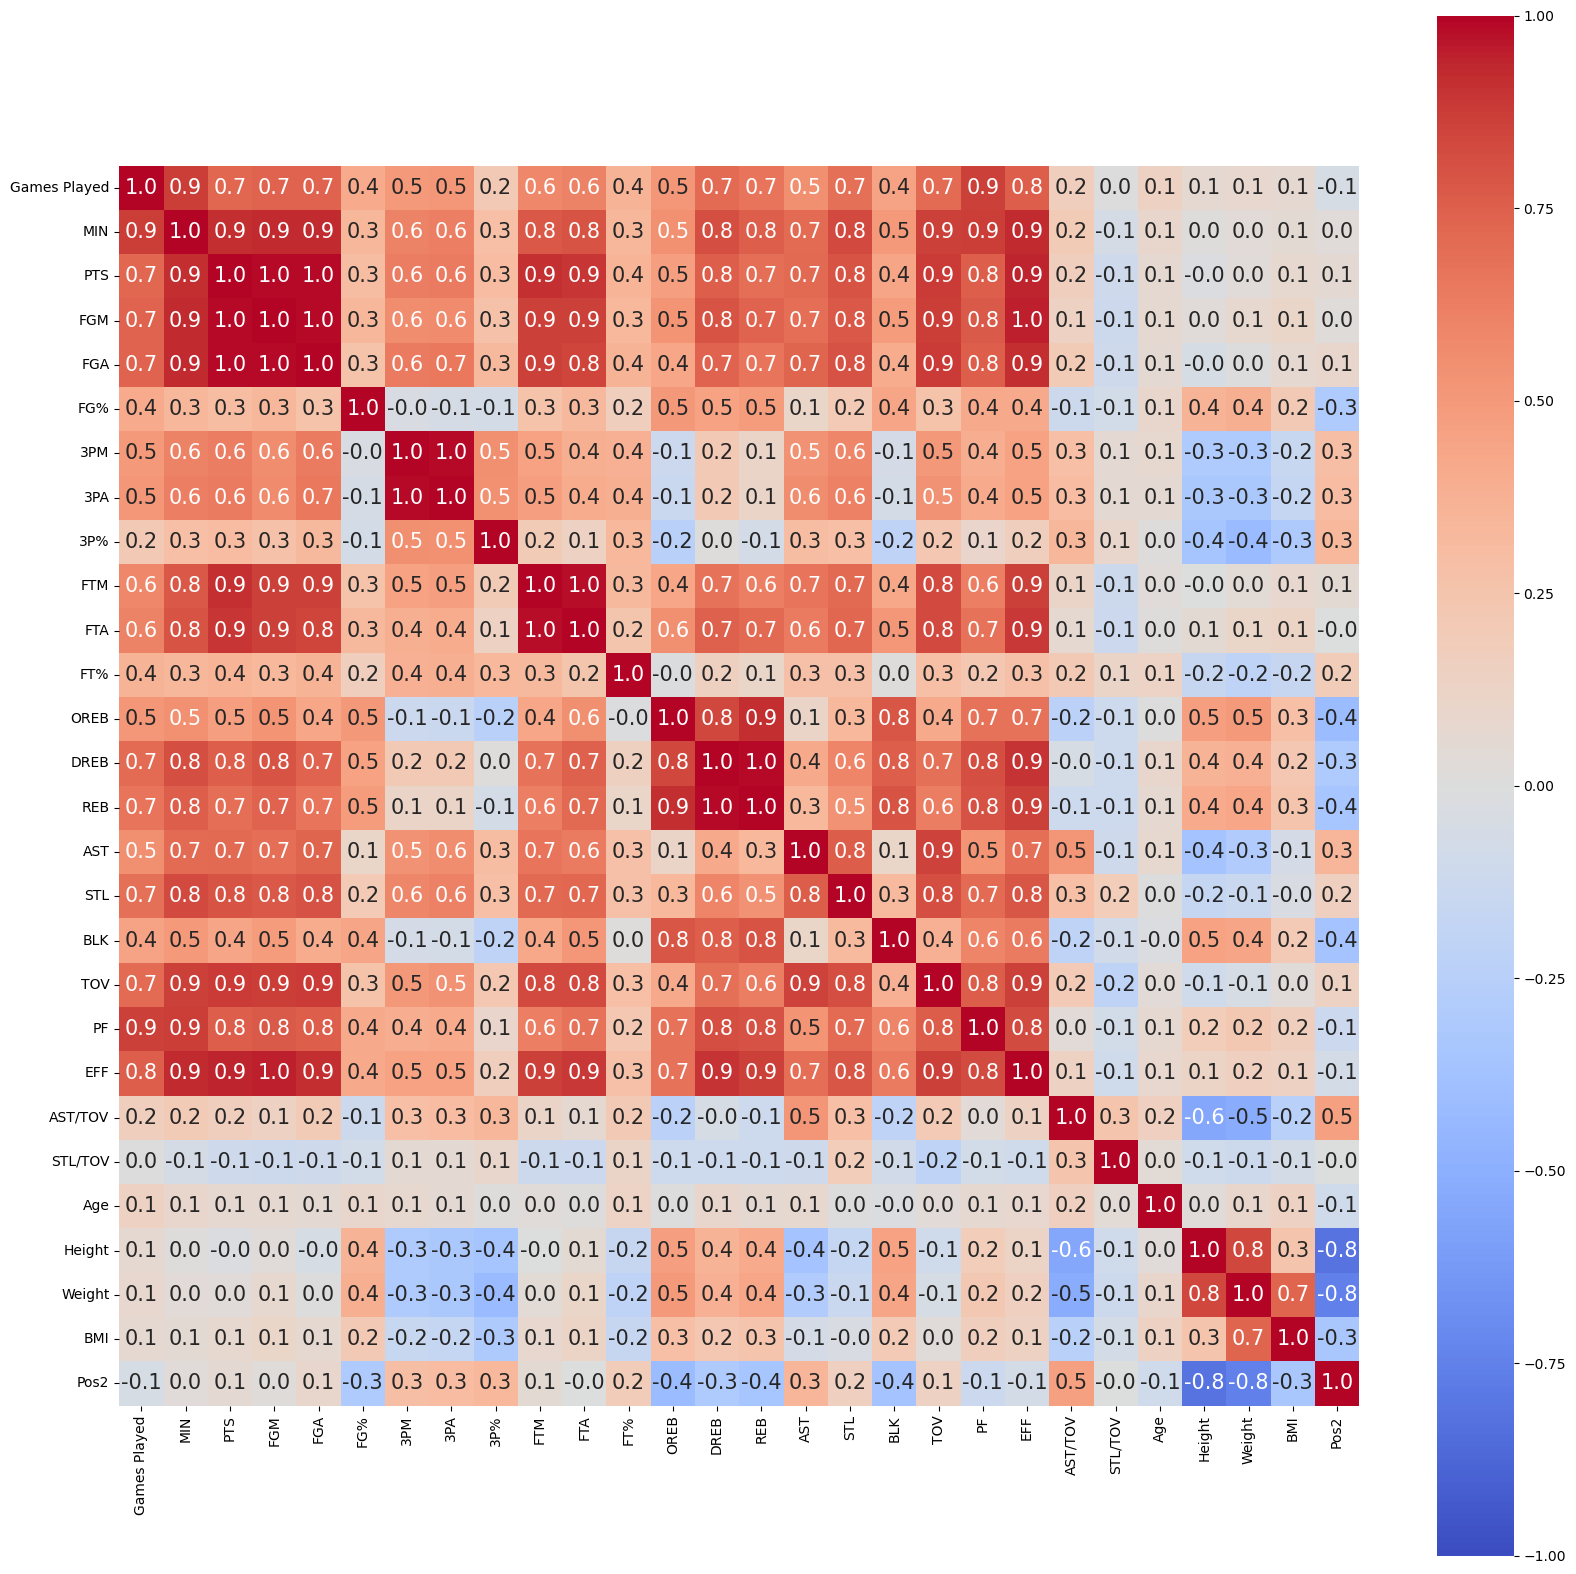

In [199]:
corr2 = data2.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr2, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()

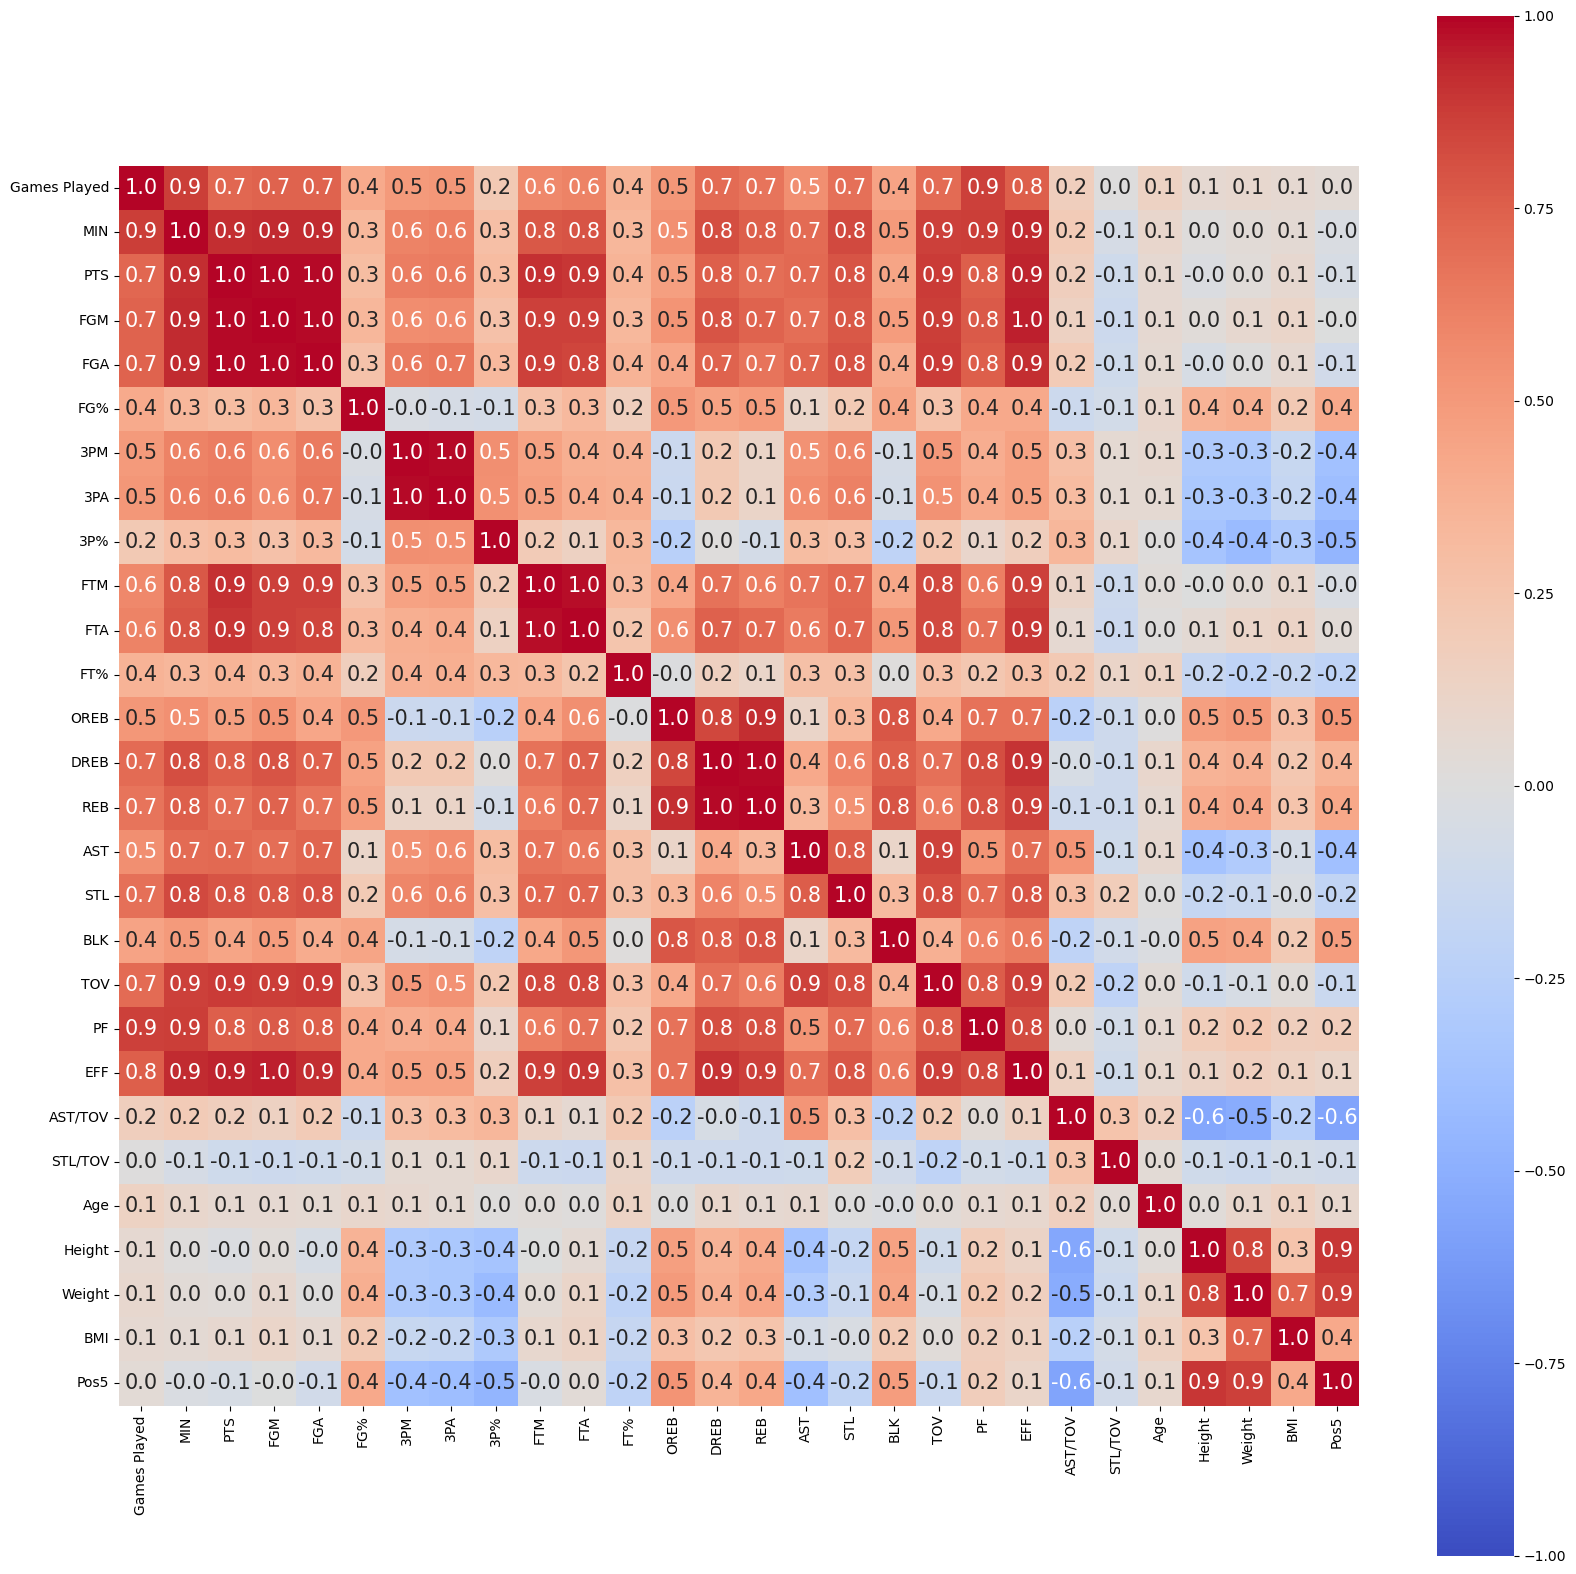

In [200]:
corr5 = data5.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr5, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.show()

In [201]:
#on observe certaines données avec une forte correlations, affichons quelques graphes montrant ces corrélations
#observons la pos des joeur en fonction du taille / poids :

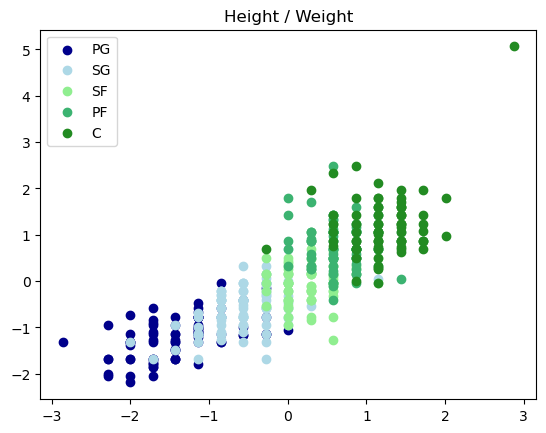

In [202]:
# Extraire les colonnes Height, Weight et Pos5
x = data5['Height']
y = data5['Weight']
z = data5['Pos5']
legend_dict = {1: 'PG', 2: 'SG', 3: 'SF', 4: 'PF', 5: 'C'}

# Définir les couleurs et les marqueurs pour chaque position
colors = [ 'darkblue','lightblue', 'lightgreen', 'mediumseagreen', 'forestgreen']
markers = ['o', 'o', 'o', 'o', 'o']

# Tracer le graphe en utilisant une boucle for pour chaque position
for i in range(1, 6):
    plt.scatter(x[z == i], y[z == i], color=colors[i-1], marker=markers[i-1], label=legend_dict[i])

# Ajouter une légende et un titre
plt.legend()
plt.title('Height / Weight')

# Afficher le graphe
plt.show()

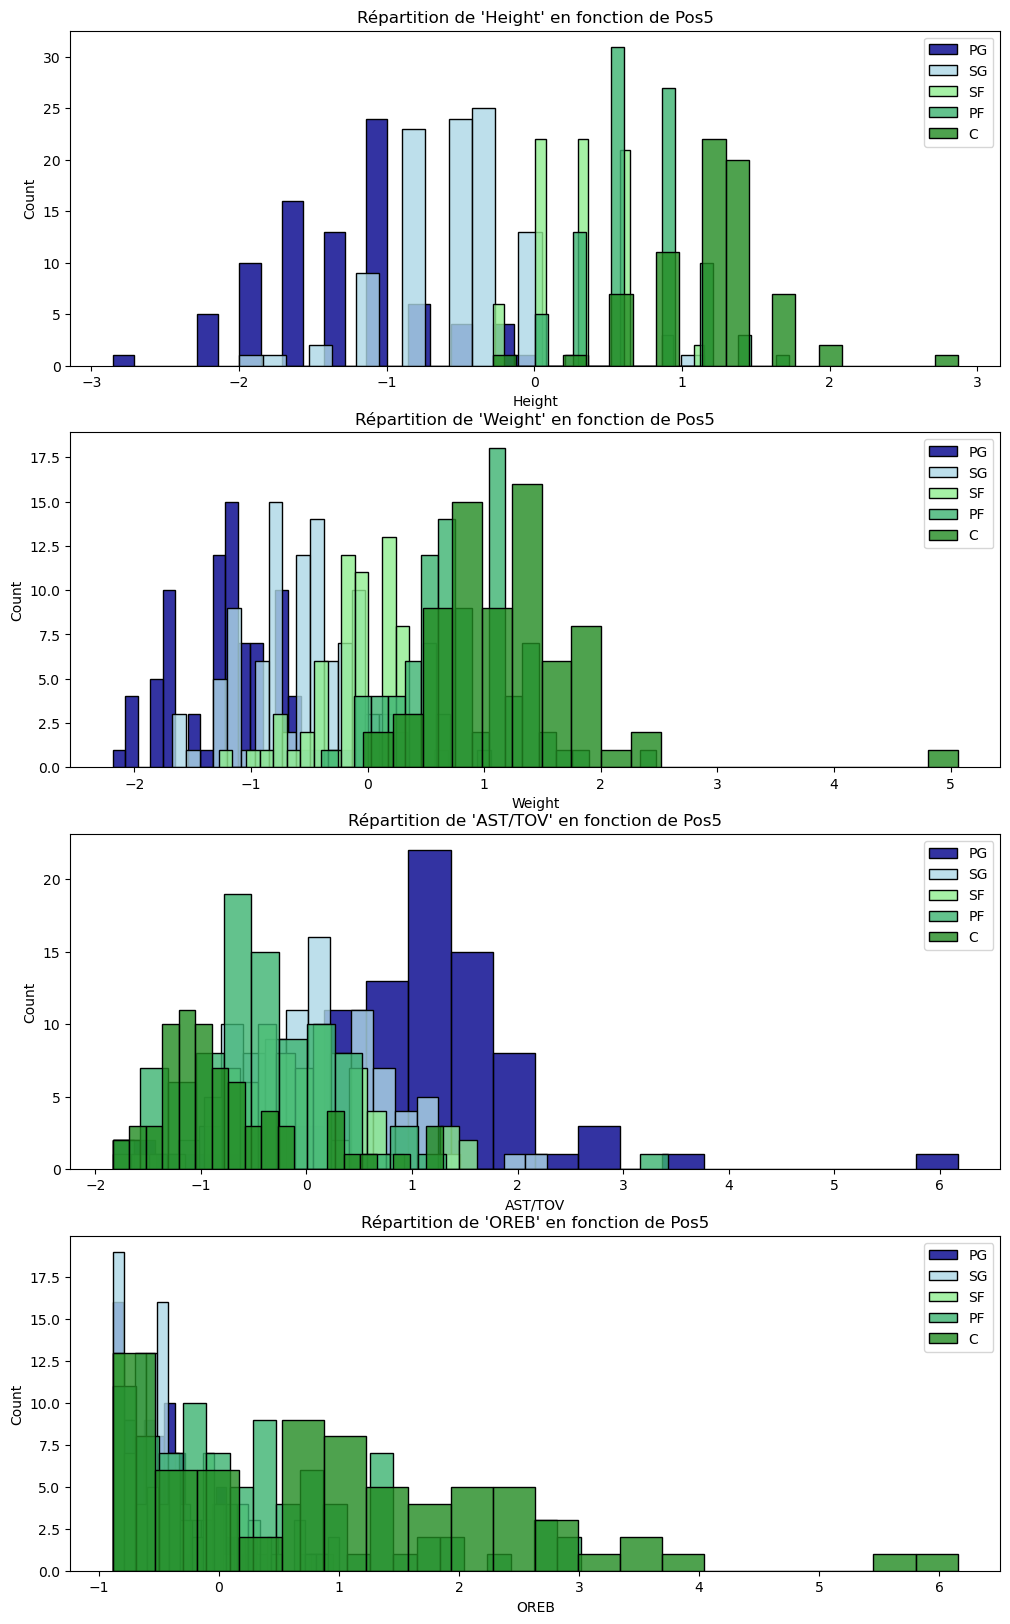

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt

# Définir les cinq couleurs pour les cinq valeurs de Pos5
colors = ['darkblue', 'lightblue', 'lightgreen', 'mediumseagreen', 'forestgreen']

# Créer une figure
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(12, 5*4))

# Tracer les histogrammes pour chaque colonne avec des couleurs différentes pour chaque valeur de Pos5
columns = ['Height', 'Weight', 'AST/TOV','OREB']
for i, col in enumerate(columns):
    for j, pos in enumerate(sorted(data5['Pos5'].unique())):
        sns.histplot(data=data5[data5['Pos5'] == pos], x=col, color=colors[j], bins=20, ax=axs[i], alpha=0.8, label=f'{legend_dict[pos]}')
    
    # Ajouter une légende et un titre pour chaque sous-graphique
    axs[i].legend()
    axs[i].set_xlabel(col)
    axs[i].set_title(f"Répartition de '{col}' en fonction de Pos5")

# Afficher la figure
plt.show()

In [204]:
#PCA
#legendes a rajouter..

In [205]:
#Tout d'abord on centre et on réduis nos donnnées : 
scaler=StandardScaler()
pca_data=scaler.fit_transform(data5)

#On applique ensuite la pca : 
n=5 # On choisi le bon nombre de composantes principal pour capté 80% de l'information 
PC=['PC'+str(i) for i in range(1,n+1)]
pca=PCA(n_components=n)
pca.fit(pca_data)
pca_data=pd.DataFrame(pca.transform(pca_data),index=data.index,columns=PC)
pca_data

,PC1,PC2,PC3,PC4,PC5
0,-3.837482,-2.572150,0.872418,-1.272586,0.871501
1,2.982313,-4.152248,0.522486,0.235297,-0.456828
2,-1.991631,0.921831,0.593969,0.114341,-1.894820
3,-2.500026,1.767681,0.579259,0.662278,-0.538095
4,4.685827,2.353460,-0.189762,-1.523623,0.438231
...,...,...,...,...,...
485,-5.169950,0.221438,0.915031,0.284201,0.345737
486,2.384922,-2.481981,1.942621,0.378849,-1.307375
487,5.604042,3.096359,-0.067392,0.047585,1.606248
488,2.638780,3.600048,-0.295882,-0.509070,1.674778


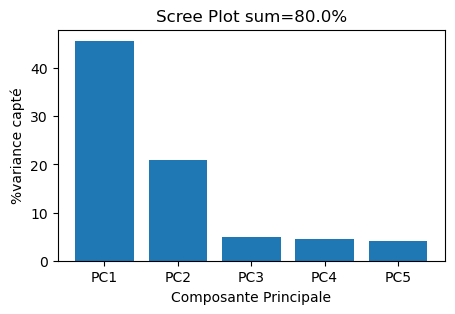

In [206]:
var=np.round(pca.explained_variance_ratio_ *100,decimals=1)
plt.figure(figsize=(5,3))
plt.bar(x=range(1,len(var)+1),height=var,tick_label=[i for i in PC])
plt.xlabel("Composante Principale")
plt.ylabel("%variance capté")
plt.title('Scree Plot sum='+str(np.round(sum(var)))+"%")
plt.show()

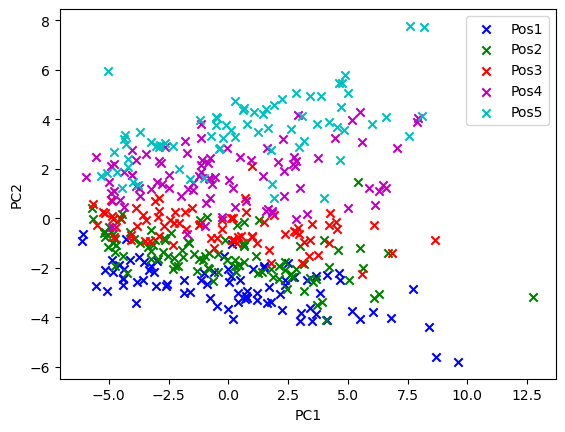

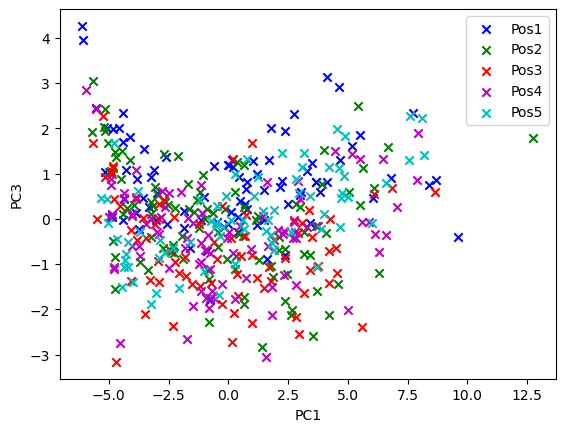

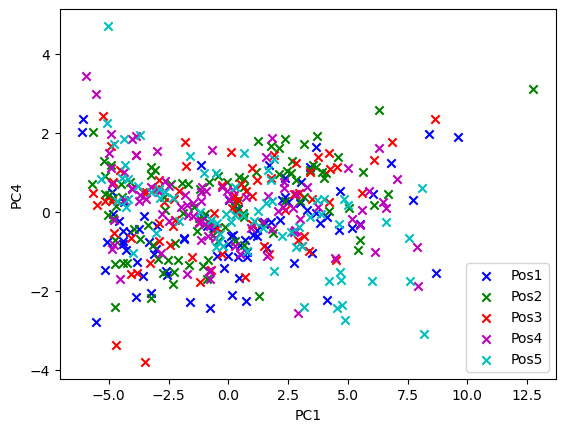

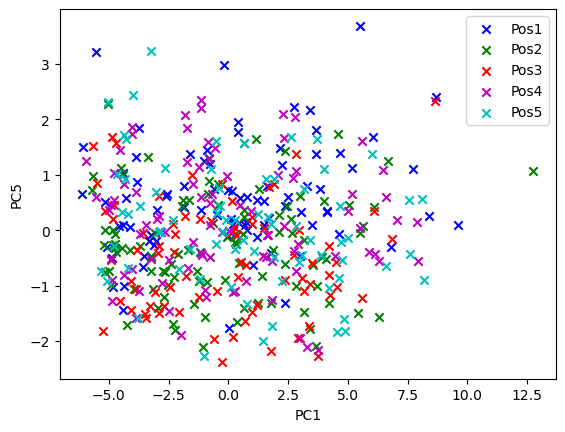

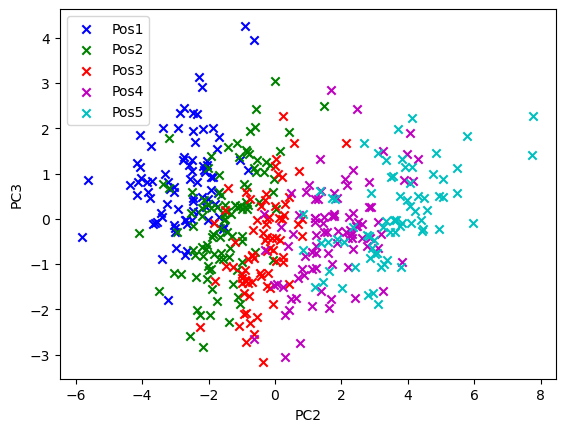

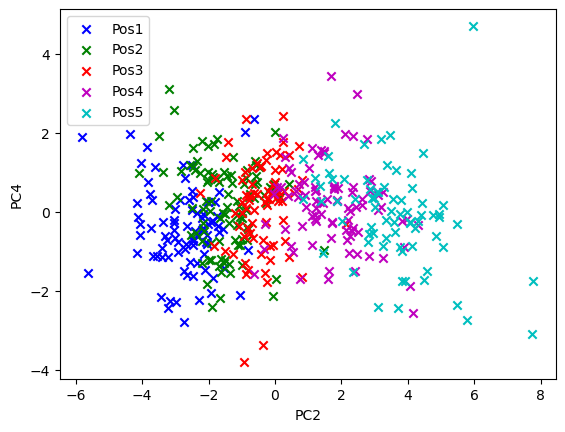

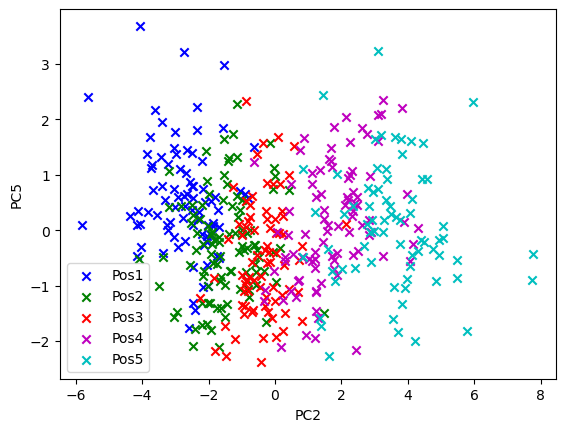

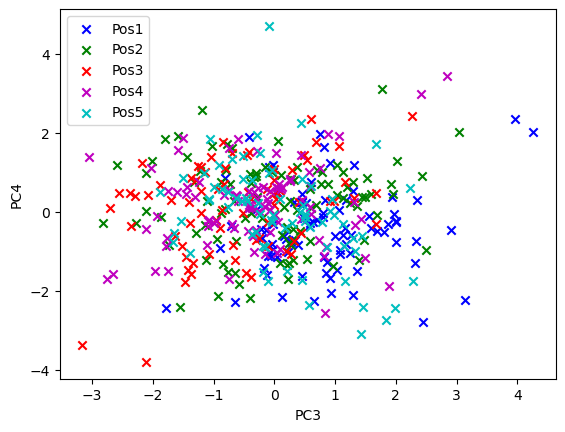

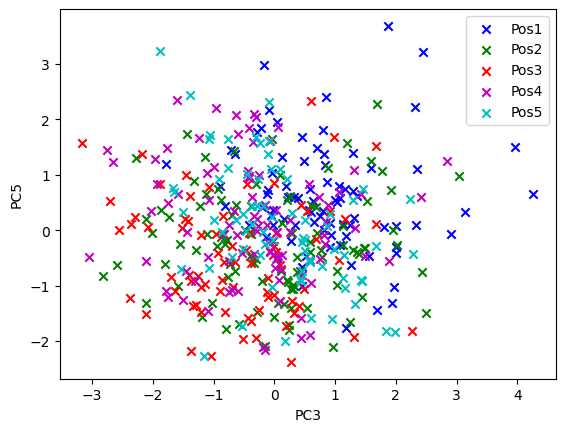

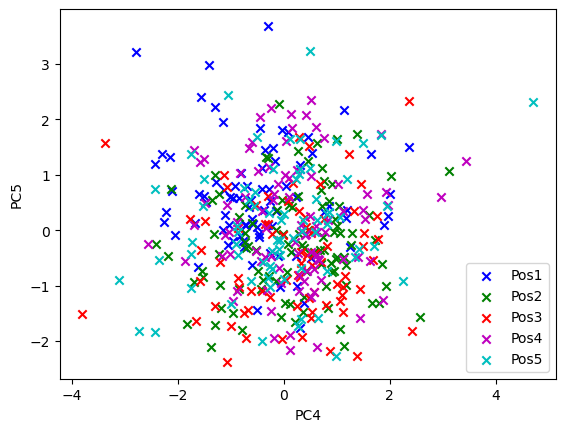

In [207]:
D=pd.concat([pca_data,data5["Pos5"]],axis=1)
g=D.groupby('Pos5')
colors=['b','g','r','m','c']
m=D['Pos5'].max()
for i in range(0,m): 
    for j in range(i+1,m):
        plt.figure()
        for k in range (1,m+1):
            plt.scatter(g.get_group(k)[PC[i]],g.get_group(k)[PC[j]],
                        marker='x',label='Pos'+str(k),color=colors[k-1])
        plt.xlabel(PC[i])
        plt.ylabel(PC[j])
        plt.legend()
        plt.show()

Text(0, 0.5, 'PC2')

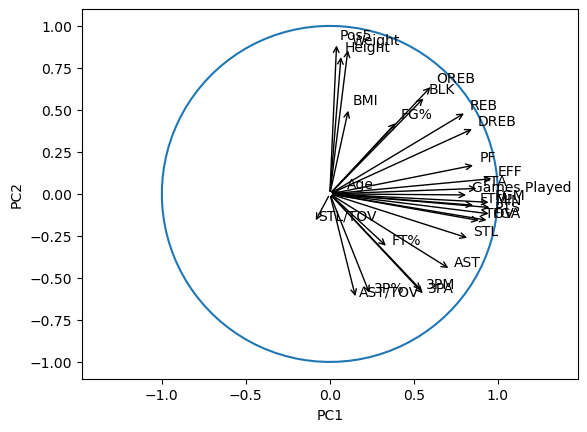

In [208]:
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))
for i in (data5.columns):
    x = np.corrcoef(pca_data['PC1'], data5[i])[0, 1]
    y = np.corrcoef(pca_data['PC2'], data5[i])[0, 1]
    plt.annotate('', xy = (x, y), xytext = (0,0), arrowprops = {'arrowstyle': '->'})
    plt.annotate(i, xy = (x + 0.02, y + 0.02))
plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')

In [209]:
loading_scores=pd.DataFrame([pca.components_[i] for i in range(0,n)], index=PC,columns=data5.columns)
loading_scores

,Games Played,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,...,TOV,PF,EFF,AST/TOV,STL/TOV,Age,Height,Weight,BMI,Pos5
PC1,0.231422,0.270386,0.269019,0.268847,0.265505,0.112461,0.154803,0.157752,0.067189,0.243198,...,0.252545,0.242870,0.273595,0.043548,-0.025613,0.023156,0.018810,0.030476,0.031485,0.011346
PC2,-0.002543,-0.034072,-0.049591,-0.020997,-0.065658,0.179287,-0.241320,-0.249630,-0.249368,-0.028249,...,-0.066617,0.071580,0.038139,-0.258592,-0.070932,0.005104,0.343959,0.360739,0.211728,0.372553
PC3,-0.185319,-0.046005,0.016733,0.026030,0.007973,-0.177337,-0.282596,-0.260715,-0.209637,0.141444,...,0.169341,-0.051889,0.056484,-0.021948,-0.378141,-0.440802,-0.199668,-0.219109,-0.157579,-0.192836
PC4,-0.121866,-0.018328,0.121424,0.083654,0.120744,-0.162079,0.295206,0.284072,0.074179,0.117977,...,0.066177,-0.077927,-0.042255,-0.405966,-0.491858,-0.094475,0.120417,0.231602,0.267991,0.083967
PC5,-0.056111,-0.030886,0.003464,0.010806,0.010248,-0.050650,-0.139199,-0.132183,-0.256725,0.054311,...,0.106592,-0.049276,0.028628,0.321878,-0.081678,0.545865,-0.217628,0.132317,0.509700,-0.072398


In [210]:
loading_scores.T['PC2'].sort_values(ascending=False)

Pos5            0.372553
Weight          0.360739
Height          0.343959
OREB            0.268076
BLK             0.240018
BMI             0.211728
REB             0.201708
FG%             0.179287
DREB            0.162332
PF              0.071580
EFF             0.038139
FTA             0.013778
Age             0.005104
Games Played   -0.002543
FGM            -0.020997
FTM            -0.028249
MIN            -0.034072
PTS            -0.049591
FGA            -0.065658
TOV            -0.066617
STL/TOV        -0.070932
STL            -0.110099
FT%            -0.132137
AST            -0.186154
3PM            -0.241320
3P%            -0.249368
3PA            -0.249630
AST/TOV        -0.258592
Name: PC2, dtype: float64